# SSSP demo, all scenarios

In [1]:
import Random: seed!
import Printf: @sprintf, @printf
using MRMP

┌ Info: Precompiling MRMP [c7aa4c1c-513e-40f4-a62b-c98230a9110a]
└ @ Base loading.jl:1317


# point2d

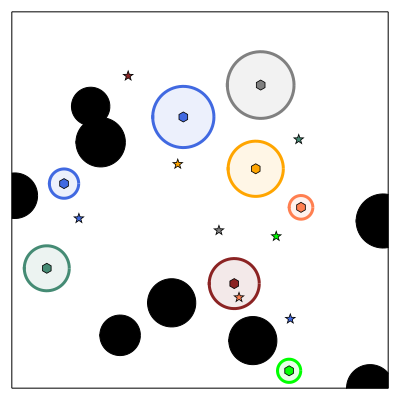

In [2]:
seed!(1)
ins = MRMP.gen_random_instance_StatePoint2D(;
    N = 8,
    rad_min = 0.025,
    rad_max = 0.1,
    num_obs = 8,
    rad_obs_min = 0.05,
    rad_obs_max = 0.10,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [3]:
seed!(2)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 5,
    VERBOSE = 2,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
@time res = smoothing(solution, connect, collide)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		0.8278 sec, explored node: 00000316, f: 0.0000, depth: 0105  2.607274 seconds (8.82 M allocations: 552.656 MiB, 5.75% gc time, 93.26% compilation time)


┌ Info: 
│ 	0.8281 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


  1.323775 seconds (3.16 M allocations: 182.738 MiB, 4.03% gc time, 99.84% compilation time)


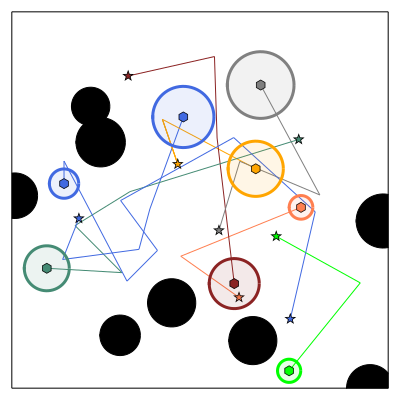

In [4]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=res[2], filename = "./fig/point2d.pdf")

┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/point2d.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/iT5yO/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/point2d.gif")
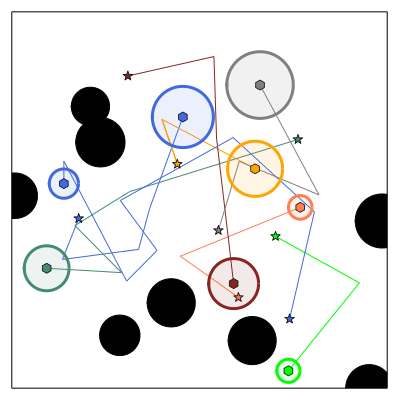

In [5]:
plot_anim!(config_init, config_goal, obstacles, ins_params...; solution=res[2], interpolate_depth=2, filename = "./fig/point2d.gif")

## point3d

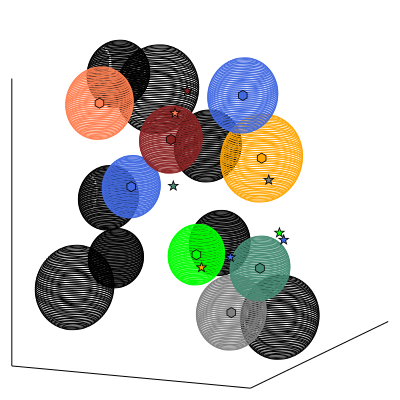

In [6]:
seed!(1)
ins = MRMP.gen_random_instance_StatePoint3D(;
    N = 8,
    rad_min = 0.1,
    rad_max = 0.15,
    num_obs = 8,
    rad_obs_min = 0.1,
    rad_obs_max = 0.15,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [7]:
seed!(2)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 5,
    VERBOSE = 2,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
@time res = smoothing(solution, connect, collide)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		0.7686 sec, explored node: 00000186, f: 0.0000, depth: 0113  1.795929 seconds (9.89 M allocations: 906.308 MiB, 11.26% gc time, 67.52% compilation time)


┌ Info: 
│ 	0.7689 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


  0.597507 seconds (1.54 M allocations: 88.853 MiB, 2.25% gc time, 99.71% compilation time)


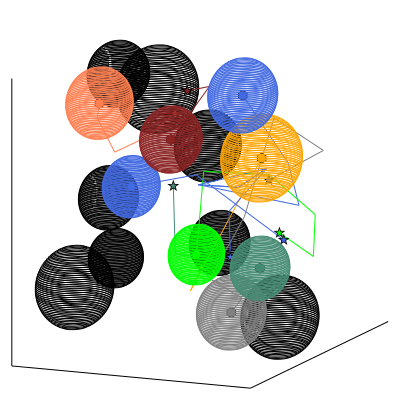

In [8]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=res[2], filename = "./fig/point3d.pdf")

plotting t = 15 / 14


┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/point3d.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/iT5yO/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/point3d.gif")
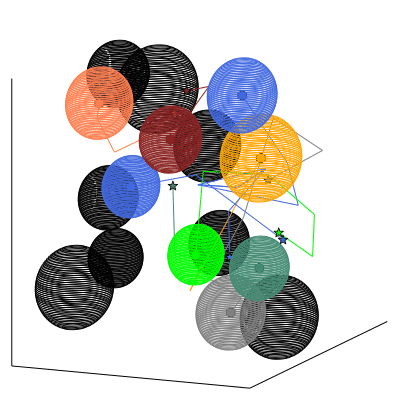

In [9]:
plot_anim!(config_init, config_goal, obstacles, ins_params...; solution=res[2], interpolate_depth=2, filename = "./fig/point3d.gif", VERBOSE=1)

## line2d

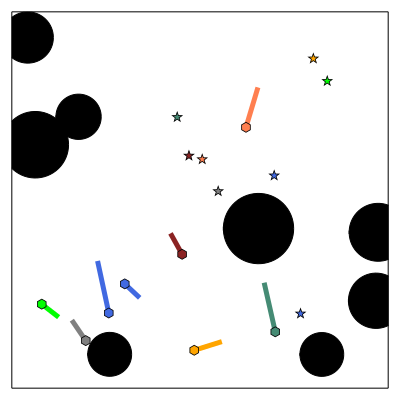

In [17]:
seed!(0)
ins = MRMP.gen_random_instance_StateLine2D(;
    N = 8,
    rad_min = 0.05,
    rad_max = 0.15,
    num_obs = 8,
    rad_obs_min = 0.05,
    rad_obs_max = 0.10,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [19]:
seed!(1)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 20,
    VERBOSE = 2,
    epsilon = 0.2,
    init_min_dist_thread = 0.05,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
@time res = smoothing(solution, connect, collide)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		1.5330 sec, explored node: 00000129, f: 0.0000, depth: 0110  1.533407 seconds (22.27 M allocations: 2.003 GiB, 18.48% gc time)


┌ Info: 
│ 	1.5333 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


  2.026927 seconds (30.40 M allocations: 2.741 GiB, 18.06% gc time)


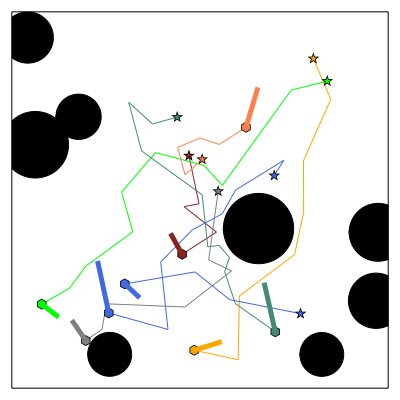

In [20]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=res[2], filename = "./fig/line2d.pdf")

┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/line2d.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/iT5yO/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/line2d.gif")
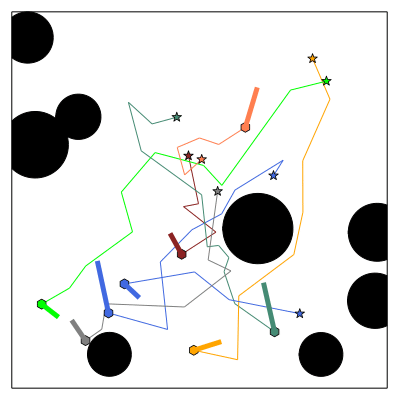

In [21]:
plot_anim!(config_init, config_goal, obstacles, ins_params...; solution=res[2], interpolate_depth=3, filename = "./fig/line2d.gif")

## arm22

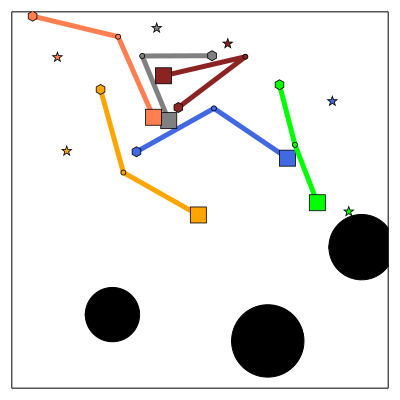

In [22]:
seed!(4)
ins = MRMP.gen_random_instance_StateArm22(;
    N = 6,
    rad_min = 0.15,
    rad_max = 0.25,
    num_obs = 3,
    rad_obs_min = 0.05,
    rad_obs_max = 0.10,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [24]:
seed!(2)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 30,
    VERBOSE = 2,
    epsilon = 0.4,
    init_min_dist_thread = 0.05,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
@time res = smoothing(solution, connect, collide)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		6.5641 sec, explored node: 00000139, f: 0.0000, depth: 0103  6.905937 seconds (100.39 M allocations: 8.925 GiB, 16.69% gc time, 5.75% compilation time)


┌ Info: 
│ 	6.5644 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


  3.596679 seconds (47.53 M allocations: 4.161 GiB, 15.00% gc time, 16.25% compilation time)


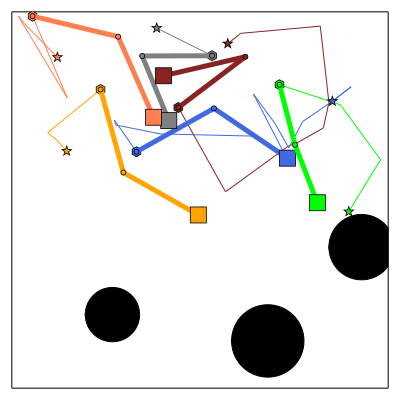

In [25]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=res[2], filename = "./fig/arm22.pdf")

plotting t = 19 / 18


┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/arm22.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/iT5yO/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/arm22.gif")
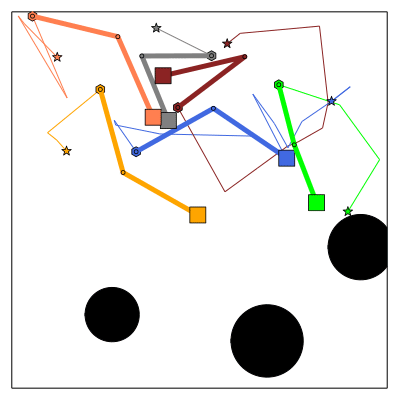

In [26]:
plot_anim!(config_init, config_goal, obstacles, ins_params...; solution=res[2], interpolate_depth=2, fps=3, VERBOSE=1, filename="./fig/arm22.gif")

## arm33

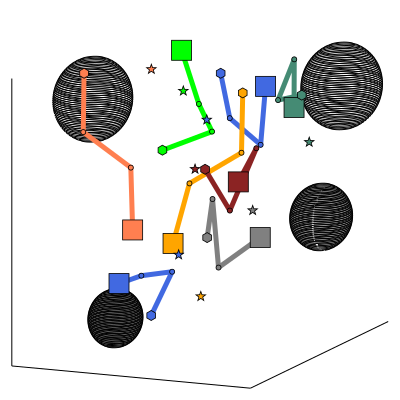

In [27]:
seed!(3)
ins = MRMP.gen_random_instance_StateArm33(;
    N = 8,
    rad_min = 0.15,
    rad_max = 0.25,
    num_obs = 4,
    rad_obs_min = 0.1,
    rad_obs_max = 0.15,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [28]:
seed!(2)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 30,
    VERBOSE = 2,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
@time res = smoothing(solution, connect, collide)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		6.8780 sec, explored node: 00000018, f: 0.0000, depth: 0018  7.971306 seconds (98.30 M allocations: 10.114 GiB, 19.31% gc time, 15.65% compilation time)


┌ Info: 
│ 	6.8782 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


 15.721625 seconds (218.82 M allocations: 22.722 GiB, 21.28% gc time, 3.66% compilation time)


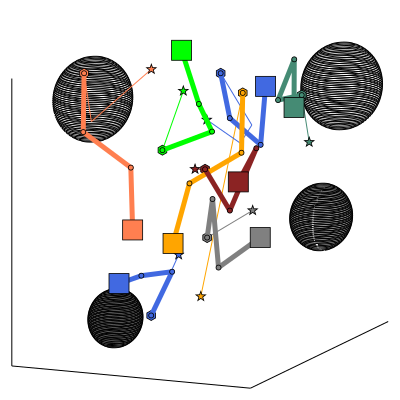

In [29]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=res[2], filename = "./fig/arm33.pdf")

┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/arm33.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/iT5yO/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/arm33.gif")
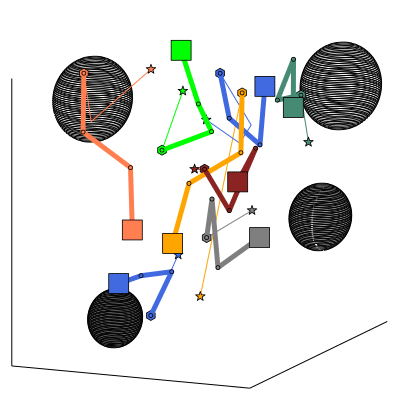

In [30]:
plot_anim!(config_init, config_goal, obstacles, ins_params...; solution=res[2], interpolate_depth=2, fps=3, filename="./fig/arm33.gif")

## capsule3d

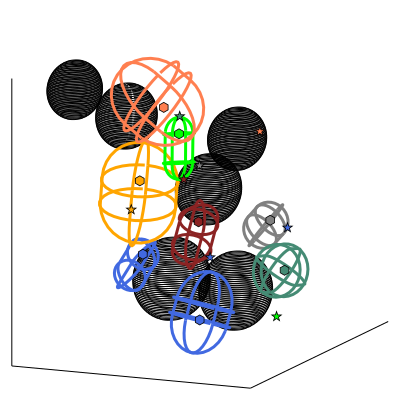

In [2]:
seed!(2)
ins = MRMP.gen_random_instance_StateCapsule3D(;
    N = 8,
    rad_min = 0.05,
    rad_max = 0.15,
    num_obs = 6,
    rad_obs_min = 0.1,
    rad_obs_max = 0.15,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [4]:
seed!(0)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 30,
    VERBOSE = 2,
    epsilon = 0.5,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
@time res = smoothing(solution, connect, collide)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		13.1552 sec, explored node: 00000344, f: 0.0000, depth: 0221 13.171127 seconds (215.69 M allocations: 20.220 GiB, 12.86% gc time, 0.12% compilation time)


┌ Info: 
│ 	13.1556 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


  1.808173 seconds (10.92 M allocations: 877.594 MiB, 5.46% gc time, 74.62% compilation time)


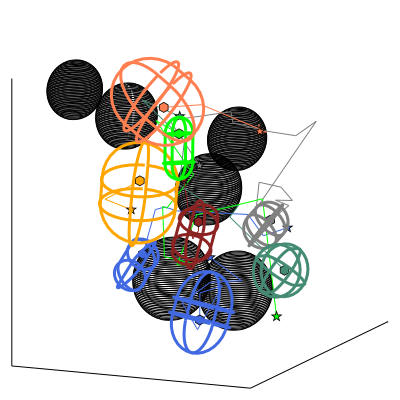

In [8]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=res[2], filename = "./fig/capsule3d.pdf")

plotting t = 18 / 17


┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/capsule3d.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/iT5yO/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/capsule3d.gif")
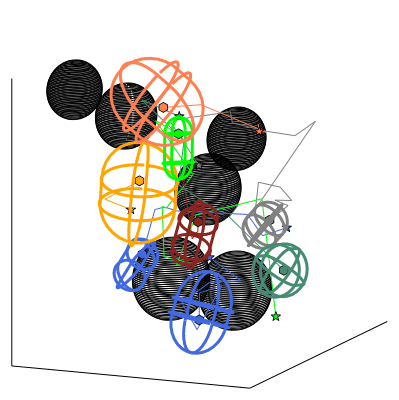

In [7]:
plot_anim!(config_init, config_goal, obstacles, ins_params...; solution=res[2], interpolate_depth=2, fps=3, VERBOSE=1, filename="./fig/capsule3d.gif")

## dubins2d

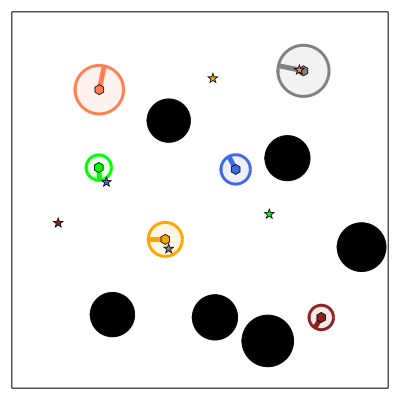

In [13]:
seed!(4)
ins = MRMP.gen_random_instance_StateDubins(;
    N = 6,
    rad_min = 0.025,
    rad_max = 0.075,
    num_obs = 6,
    rad_obs_min = 0.05,
    rad_obs_max = 0.07,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [14]:
seed!(0)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 30,
    VERBOSE = 2,
    epsilon = 0.5,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
@time res = smoothing(solution, connect, collide)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		4.9476 sec, explored node: 00000543, f: 0.0000, depth: 0128  4.956577 seconds (87.20 M allocations: 6.870 GiB, 12.80% gc time, 0.17% compilation time)


┌ Info: 
│ 	4.9479 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


  0.761377 seconds (4.74 M allocations: 330.938 MiB, 7.11% gc time, 77.43% compilation time)


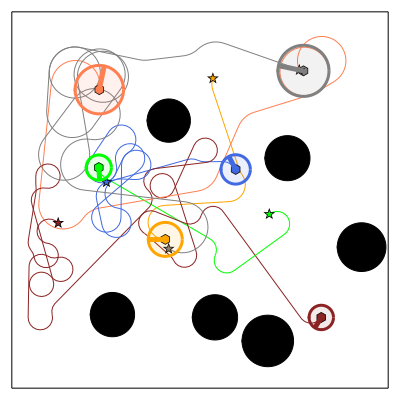

In [15]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=res[2], filename = "./fig/dubins2d.pdf")

plotting t = 24 / 23


┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/dubins2d.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/iT5yO/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/dubins2d.gif")
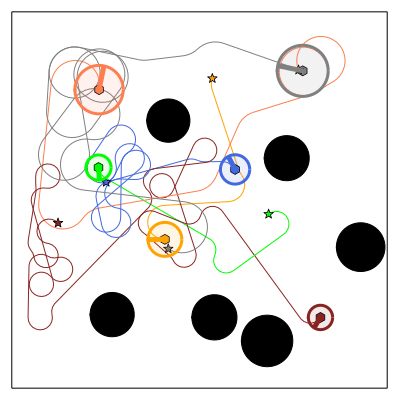

In [16]:
plot_anim!(config_init, config_goal, obstacles, ins_params...; solution=res[2], interpolate_depth=2, fps=3, VERBOSE=1, filename = "./fig/dubins2d.gif")

## snake2d

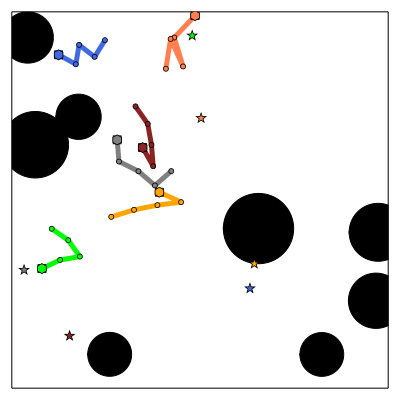

In [19]:
seed!(0)
ins = MRMP.gen_random_instance_StateSnake2D(;
    N = 6,
    rad_min = 0.05,
    rad_max = 0.1,
    num_obs = 8,
    rad_obs_min = 0.05,
    rad_obs_max = 0.10,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [20]:
seed!(4)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 60,
    VERBOSE = 2,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
@time res = smoothing(solution, connect, collide)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		8.9362 sec, explored node: 00000031, f: 0.0000, depth: 0031  8.943837 seconds (124.77 M allocations: 11.140 GiB, 19.23% gc time, 0.08% compilation time)


┌ Info: 
│ 	8.9364 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


  1.702265 seconds (17.31 M allocations: 1.503 GiB, 12.66% gc time, 37.09% compilation time)


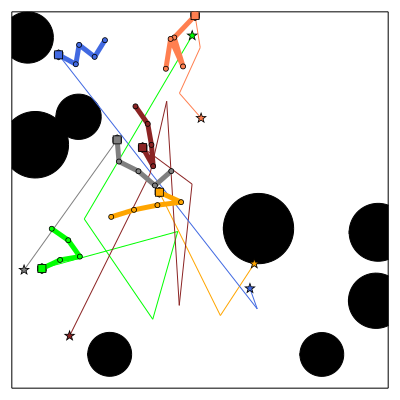

In [21]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=res[2], filename = "./fig/snake2d.pdf")

plotting t = 11 / 10


┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/snake2d.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/iT5yO/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/massive-control/simulator/notebooks/fig/snake2d.gif")
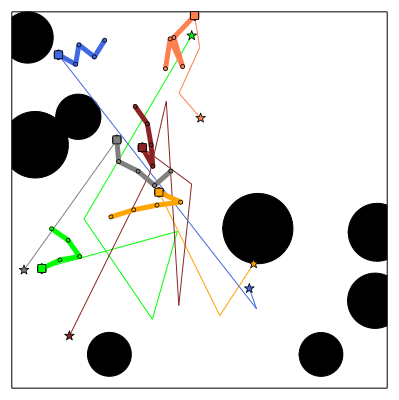

In [22]:
plot_anim!(config_init, config_goal, obstacles, ins_params...; solution=res[2], interpolate_depth=2, fps=3, VERBOSE=1, filename = "./fig/snake2d.gif")